# Airline Sentiment Analysis

## Table of Contents:
* [Data Collection](#DataCollection)
* [Data Wrangling](#DataWrangling)
* [EDA](#EDA)
    * [Airline Sentiment EDA](#airlineSentimentEDA)
    * [Airline EDA](#airlineEDA)
    * [Date vs Airline Sentiment](#Date)
    * [User Timezone](#user_timezone)
* [Conclusion](#Conclusion) 

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#this will deal with punctuation
import string
#TOKENIZATTION
import re
#STOPWORDS
#from nltk.corpus import stopwords 
#import nltk
#LEMMATIZING
from nltk.stem import WordNetLemmatizer
from emoji import UNICODE_EMOJI
import emoji
from string import digits

import nltk #using the Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 1. Data Collection <a class="anchor" id="DataCollection"></a>

In [2]:
#get data
tweets = pd.read_csv("../Data/Tweets.csv")

# 2. Data Wrangling <a class="anchor" id="DataWrangling"></a>

The following needs to be done to preprocess the data:

1. Make text lowercase
2. Removing punctuations, URLs, names
3. Tokenization
4. Removing stopwords ("this", "is", etc.)
4. Lemmatizing

In [3]:
#drop columns of >= 90% null values
tweets = tweets.drop(columns=["airline_sentiment_gold" , "negativereason_gold", "tweet_coord"])

In [4]:
#Lowercase
tweets["text"] = tweets["text"].str.lower()

#remove numbers
tweets["text"] = tweets["text"].str.replace('\d+', '', regex=True)

##REMOVE PUNCTUATIONS
def remove_punc(text):
    words_wo_punct = re.sub(r"[^A-Za-z0-9\s]+", "", text)
    return words_wo_punct

tweets["text"] = tweets["text"].apply(lambda x: remove_punc(x))

In [5]:
#REMOVE WHITESPACE
tweets["text"] = tweets["text"].str.strip()

#remove emoji
tweets["text"] = tweets["text"].apply(lambda x: emoji.demojize(x))
tweets["text"].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

In [6]:
#LEMMATIZING
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    word_list = nltk.word_tokenize(text)
    lem_text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lem_text

tweets["text"] = tweets["text"].apply(lambda x: word_lemmatizer(x))
tweets.text.head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercial to t...
2    virginamerica i didnt today must mean i need t...
3    virginamerica it really aggressive to blast ob...
4    virginamerica and it a really big bad thing ab...
Name: text, dtype: object

In [7]:
#REMOVE STOPWORDS and tokenize
def remove_stopwords(text):
    tokens = word_tokenize(text)
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
    
    return tokens_wo_stopwords

tweets["text"] = tweets["text"].apply(lambda x: remove_stopwords(str(x)))
tweets["text"].head()

0                      [virginamerica, dhepburn, said]
1    [virginamerica, plus, youve, added, commercial...
2    [virginamerica, didnt, today, must, mean, need...
3    [virginamerica, really, aggressive, blast, obn...
4             [virginamerica, really, big, bad, thing]
Name: text, dtype: object

# 3. EDA <a class="anchor" id="EDA"></a>

#### View the polarity of a tweet 

In [8]:
from textblob import TextBlob, Word, Blobber
tweets['polarity']=tweets['text'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,polarity
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.00000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,"[virginamerica, plus, youve, added, commercial...",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.00000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,"[virginamerica, didnt, today, must, mean, need...",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-0.31250
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"[virginamerica, really, aggressive, blast, obn...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.00625
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,"[virginamerica, really, big, bad, thing]",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-0.35000


#### View the distribution of the polarity of the tweet

Text(0.5, 1.0, 'Distibution of polarity')

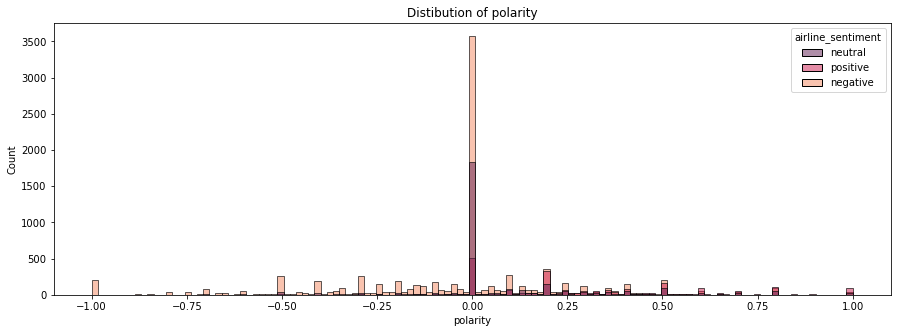

In [9]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.histplot(x = tweets["polarity"], palette="rocket", hue=tweets["airline_sentiment"])

plt.title("Distibution of polarity")

Let's look at the length of text

Text(0.5, 1.0, 'Distibution of text length')

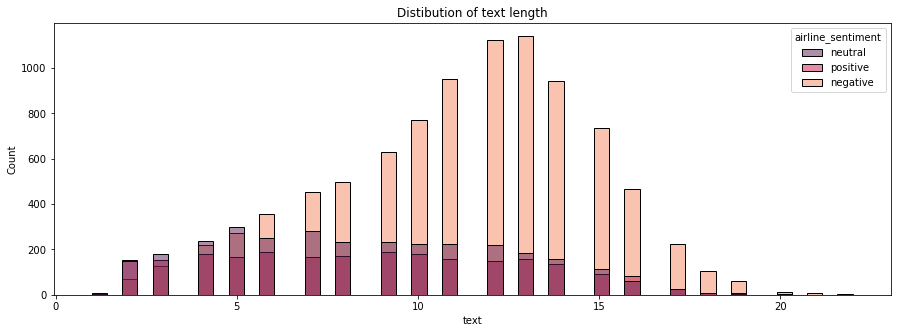

In [10]:
fig, axes = plt.subplots(figsize=(15, 5))
textLen = tweets["text"].apply(lambda x: len(x))
axes = sns.histplot(x = textLen, palette="rocket", hue=tweets["airline_sentiment"], bins=50)

plt.title("Distibution of text length")

### Word count

In [11]:
# get a word count per sentence column
def wordCount(text):
    return len(text)

tweets["word_count"] = tweets["text"].apply(lambda x: wordCount(x))

tweets.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,polarity,word_count
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.0000,3
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,"[virginamerica, plus, youve, added, commercial...",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.0000,7
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,"[virginamerica, didnt, today, must, mean, need...",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-0.3125,9


### Let's visualize this

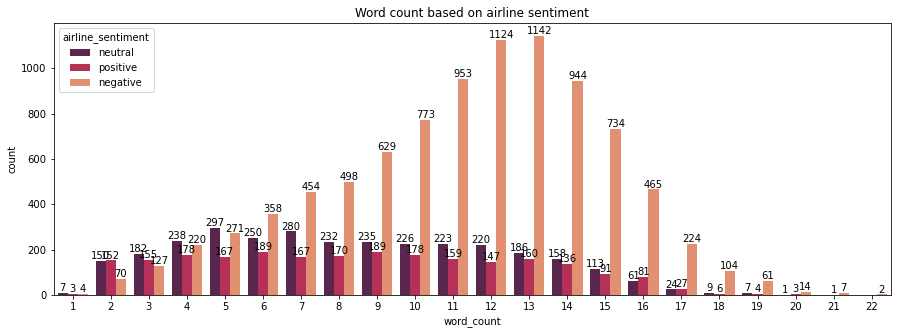

In [12]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = tweets.word_count, hue=tweets.airline_sentiment, palette="rocket")

plt.title("Word count based on airline sentiment")

for container in axes.containers:
    axes.bar_label(container)

The negative sentiment has more words in the tweet

### EDA based on airline sentiment <a class="anchor" id="airlineSentimentEDA"></a>

#### View distribution of airline_sentiment_confidence

Text(0.5, 1.0, 'Airline Sentiment Confidence Distributions')

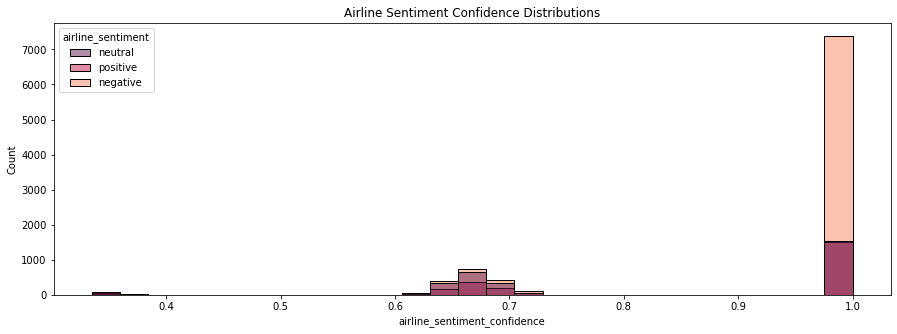

In [13]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.histplot(tweets, x="airline_sentiment_confidence", hue="airline_sentiment", palette="rocket")
plt.title("Airline Sentiment Confidence Distributions")

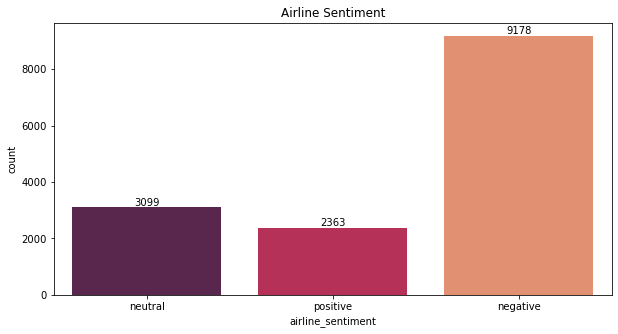

In [14]:
#see the difference between views
fig, axes = plt.subplots(figsize=(10, 5))
axes = sns.countplot(x="airline_sentiment", data=tweets, palette="rocket")
plt.title("Airline Sentiment")
for container in axes.containers:
    axes.bar_label(container)

### Most of the sentiment is negative.

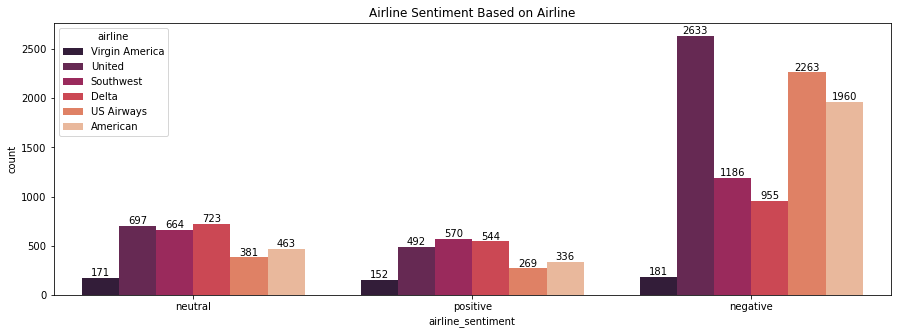

In [15]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x="airline_sentiment", hue="airline", data=tweets, palette="rocket")

plt.title("Airline Sentiment Based on Airline")
for container in axes.containers:
    axes.bar_label(container)

Text(0.5, 1.0, 'Airlines')

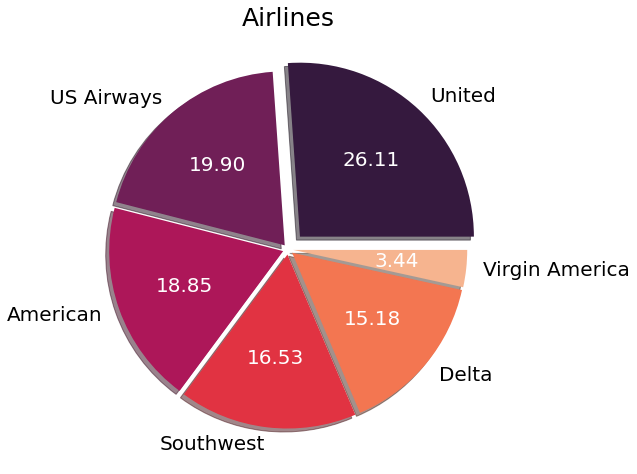

In [16]:
colors= sns.color_palette('rocket')
al = tweets["airline"].value_counts()
myexplode = [0.10, 0.03, 0.03, 0.03, 0.03, 0.03]

pie, ax = plt.subplots(figsize=[20,8])
_, _, autotexts = plt.pie(al, labels = al.keys(), colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 20})

for ins in autotexts:
    ins.set_color('white')

plt.title("Airlines", fontsize=25)

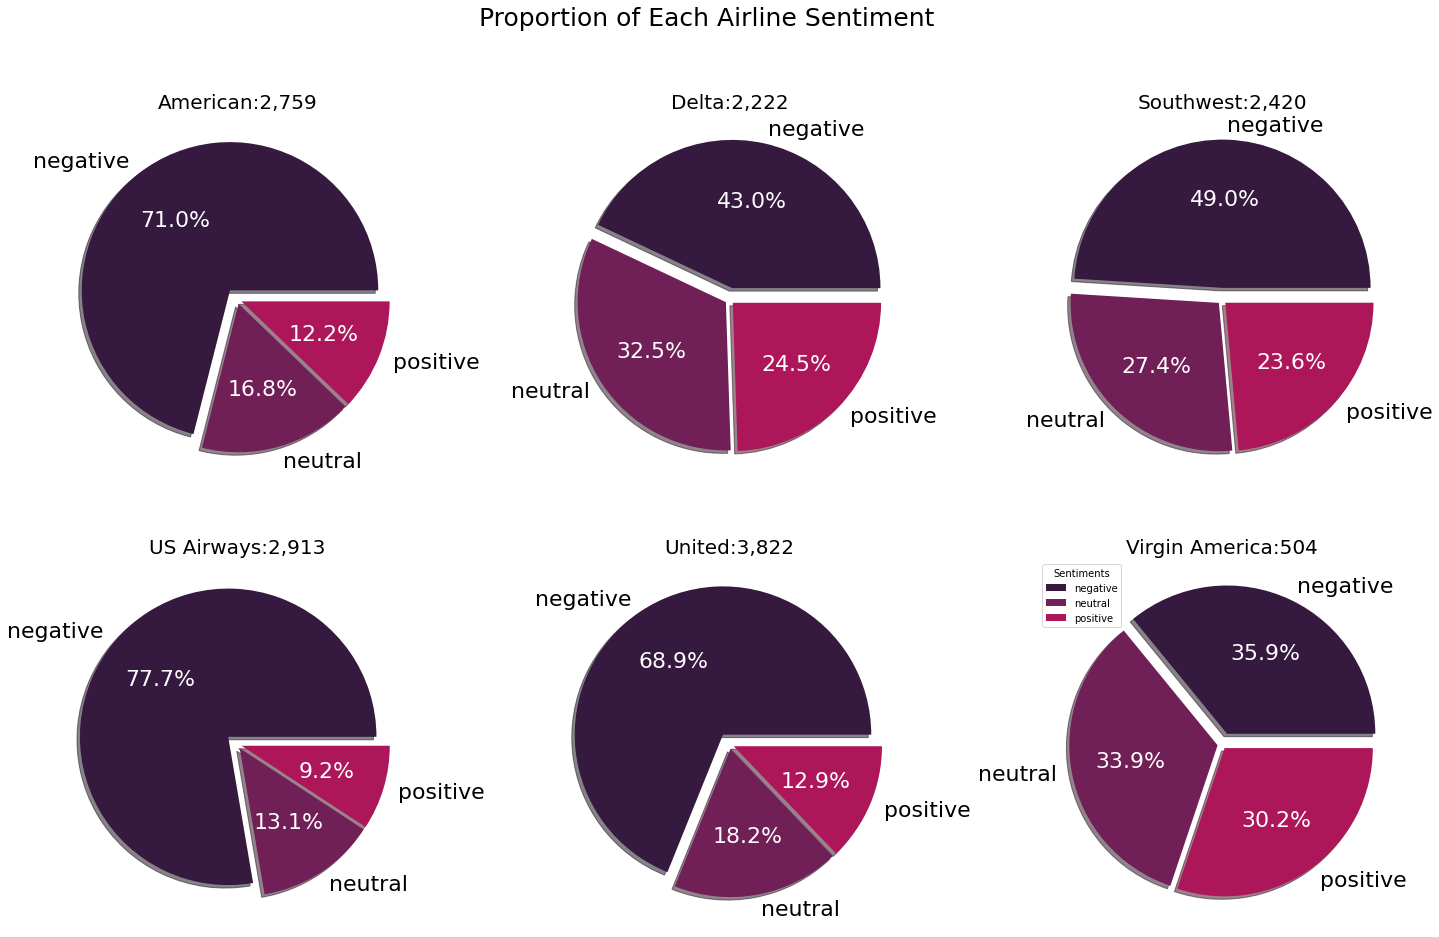

In [17]:
airlines = tweets.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count().unstack()
colors= sns.color_palette('rocket')
myexplode = [0.08, 0.03, 0.03]

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.flatten()

for i, ax in zip(range(0, 6), axes):
    temp = airlines.iloc[i]
    #plt.rcParams.update({'font.size': 20})
    _, _, autotexts = ax.pie(x=temp, labels = temp.index, autopct="%.1f%%", colors=colors, 
           explode = myexplode, shadow = True, textprops={'fontsize': 22})
    ax.set_title(f"{airlines.index[i]}:{format(airlines.values[i].sum(),',')}", fontsize=20)
    for ins in autotexts:
        ins.set_color('white')
    
    
    
plt.suptitle("Proportion of Each Airline Sentiment", fontsize = 25)    
plt.legend(title = "Sentiments")
plt.show()

In [18]:
#make a function to get most common words

import itertools
import collections

def mostWords(tweet, title="Top Words"):
    mostWordsTweets = tweet
    
    mostWords = list(itertools.chain(*mostWordsTweets["text"]))
    wordCount = collections.Counter(mostWords)
    wordCount.most_common(20)
    
    #make a dataframe
    wordCountDF = pd.DataFrame(wordCount.most_common(20), columns=["Word", "Count"])
    
    #plot
    fig, axes = plt.subplots(figsize=(15, 5))
    axes = sns.barplot(y="Word", x="Count", data=wordCountDF.head(10), palette="rocket")
    plt.title(title)
    plt.xticks(rotation = 45)

    for container in axes.containers:
        axes.bar_label(container)
    #return wordCountDF.head(10)
    
    #return wordCountDF.head(11)

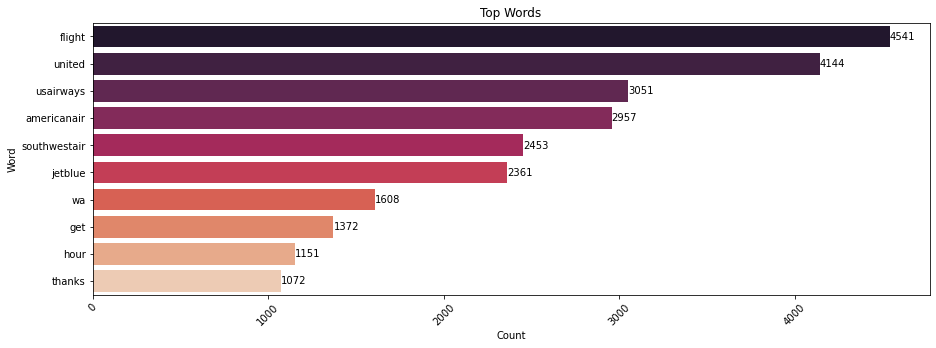

In [19]:
allWords = tweets
mostWords(allWords)

### Top words with negative sentiment

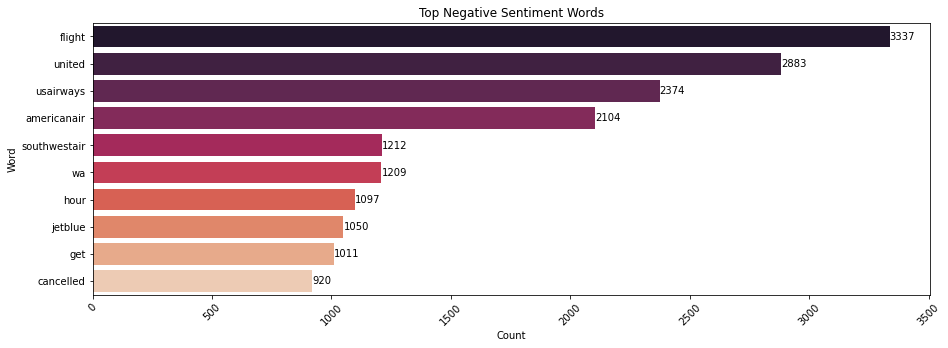

In [20]:
negWords = tweets[tweets["airline_sentiment"] == "negative"]
mostWords(negWords, "Top Negative Sentiment Words")

### Top words with positive sentiment

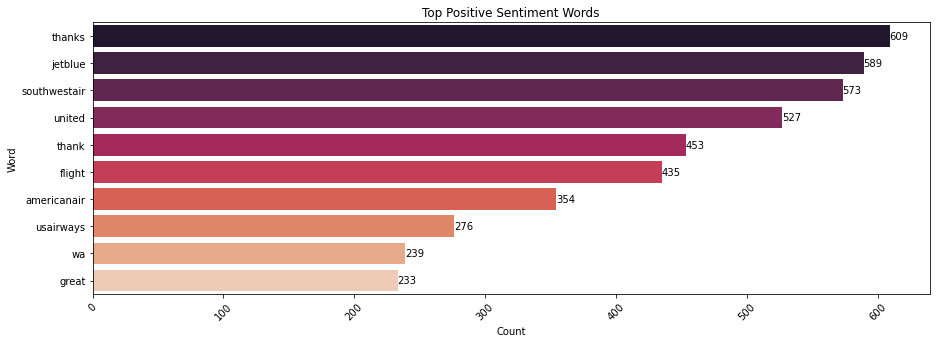

In [21]:
posWords = tweets[tweets["airline_sentiment"] == "positive"]
mostWords(posWords, "Top Positive Sentiment Words")

### Top words with neutral sentiment

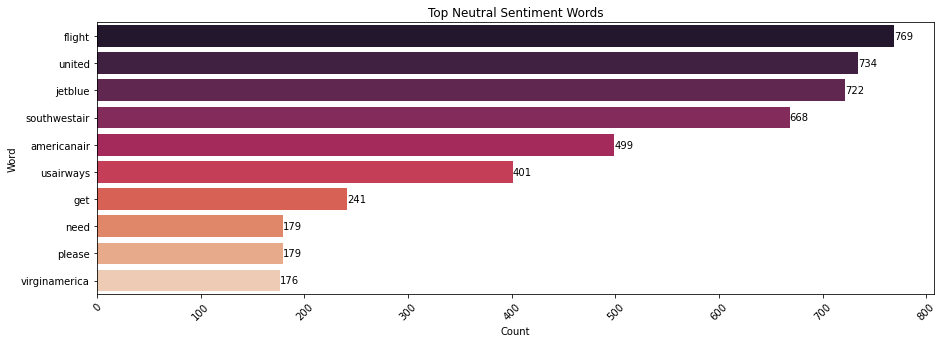

In [22]:
neuWords = tweets[tweets["airline_sentiment"] == "neutral"]
mostWords(neuWords, "Top Neutral Sentiment Words")

### View the amount of retweets in the tweet

In [23]:
#get the top and lowest tweet with retweet
print("The max retweets are: " + str(max(tweets["retweet_count"])))
print("The min retweets are: " + str(min(tweets["retweet_count"])))

The max retweets are: 44
The min retweets are: 0


In [24]:
tweets.sort_values("retweet_count", ascending="False" ).head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,polarity,word_count
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,cairdin,0,"[virginamerica, dhepburn, said]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.000000,3
9681,569720701197750272,negative,1.0,Can't Tell,1.0000,US Airways,jamokee,0,"[usairways, worst]",2015-02-22 20:49:34 -0800,"Sandy Eggo, California",Alaska,-1.000000,2
9682,569719964023853056,negative,1.0,Customer Service Issue,0.6643,US Airways,MelCMP,0,"[usairways, making, folk, run, gate, c, b, exp...",2015-02-22 20:46:38 -0800,Pennsylvania,Eastern Time (US & Canada),0.000000,14
9683,569719741906075648,negative,1.0,Late Flight,1.0000,US Airways,RishiKumar8,0,"[usairways, waiting, airplane, total, hour, ta...",2015-02-22 20:45:46 -0800,NaN,Quito,-0.125000,11
9684,569719242427396096,negative,1.0,Cancelled Flight,0.6987,US Airways,MelCMP,0,"[usairways, given, option, new, flight, cant, ...",2015-02-22 20:43:46 -0800,Pennsylvania,Eastern Time (US & Canada),-0.431818,15


#### EDA based on airline <a class="anchor" id="airlineEDA"></a>

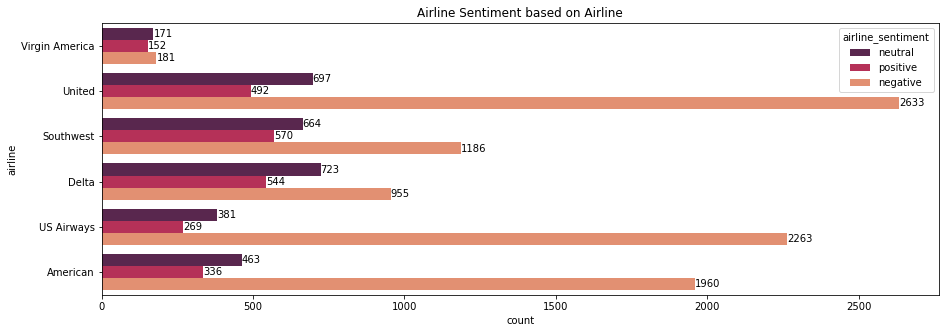

In [25]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(y="airline", hue="airline_sentiment", data=tweets, palette="rocket")
plt.title("Airline Sentiment based on Airline")

for container in axes.containers:
    axes.bar_label(container)

### <b>Get the most predictive words by airline</b>

#### Virgin America

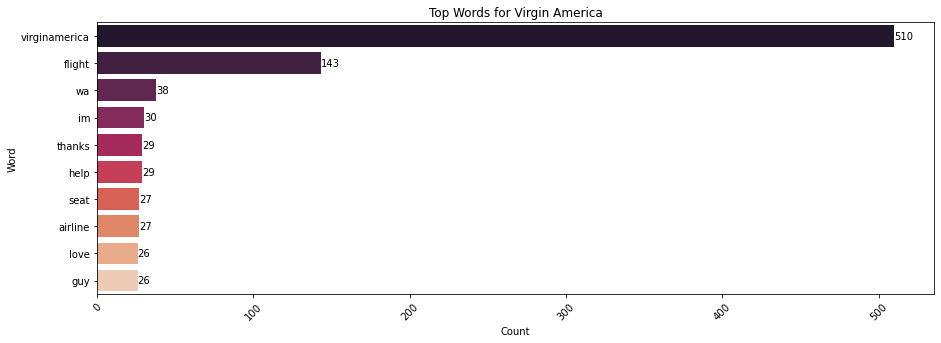

In [26]:
#all words
vaTweets = tweets[tweets["airline"] == "Virgin America"] 
mostWords(vaTweets, "Top Words for Virgin America")

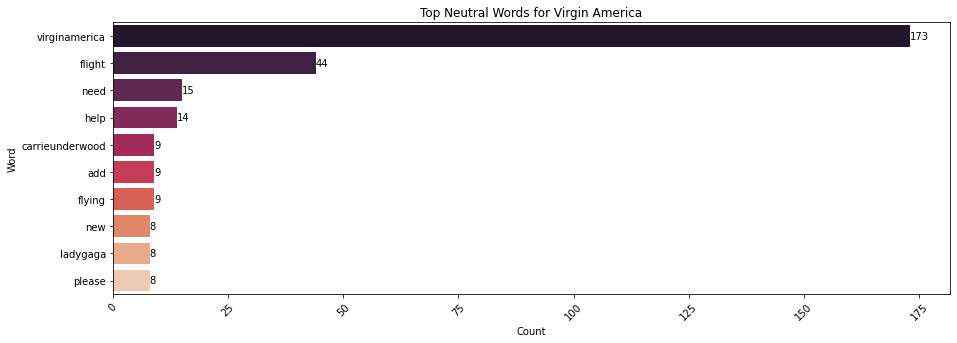

In [27]:
#neutral words
vaTweets = tweets[(tweets["airline"] == "Virgin America") & (tweets["airline_sentiment"] == "neutral")] 
mostWords(vaTweets, "Top Neutral Words for Virgin America")

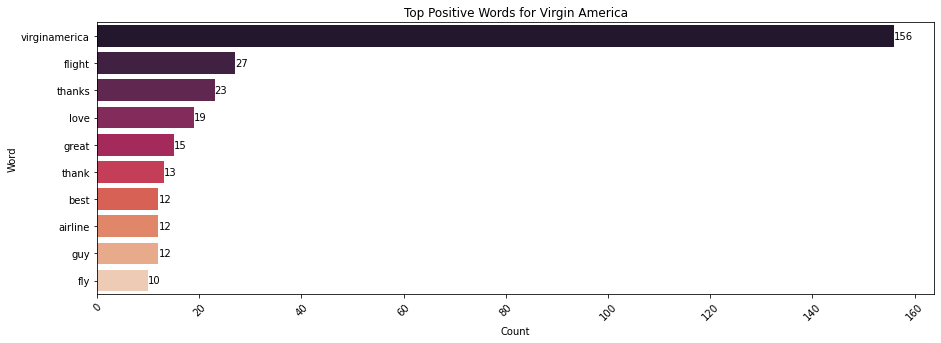

In [28]:
#positive words
vaTweets = tweets[(tweets["airline"] == "Virgin America") & (tweets["airline_sentiment"] == "positive")] 
mostWords(vaTweets, "Top Positive Words for Virgin America")

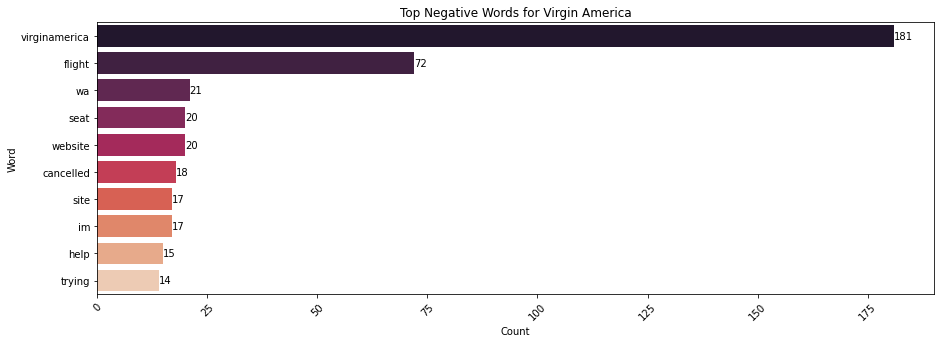

In [29]:
#negative words
vaTweets = tweets[(tweets["airline"] == "Virgin America") & (tweets["airline_sentiment"] == "negative")] 
mostWords(vaTweets, "Top Negative Words for Virgin America")

#### United

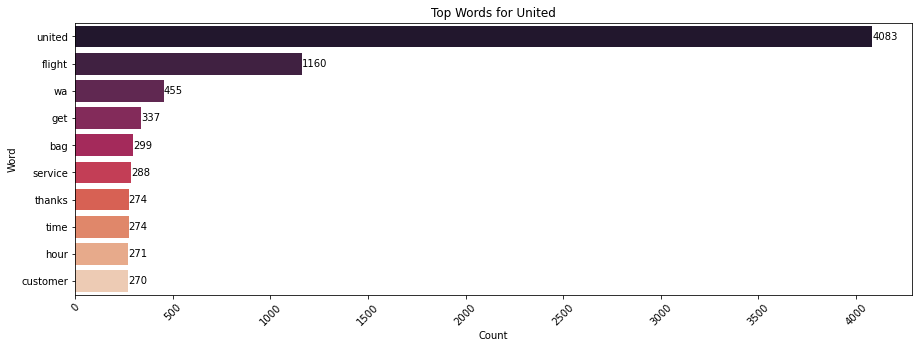

In [30]:
#all word
unitedTweets = tweets[tweets["airline"] == "United"]
mostWords(unitedTweets, "Top Words for United")

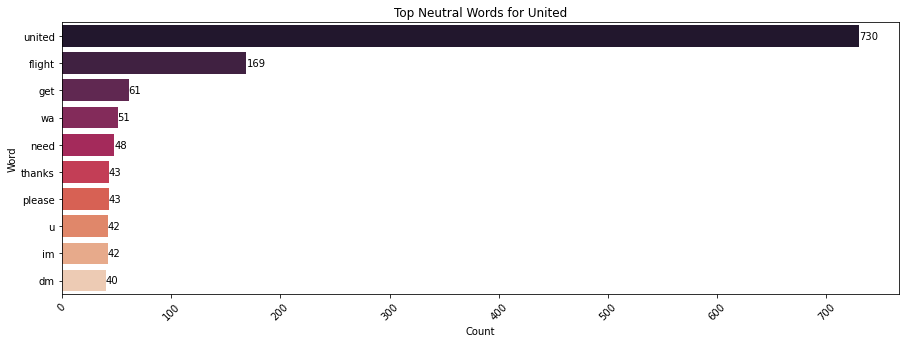

In [31]:
#neutral words
unitedTweets = tweets[(tweets["airline"] == "United") & (tweets["airline_sentiment"] == "neutral")]
mostWords(unitedTweets, "Top Neutral Words for United")

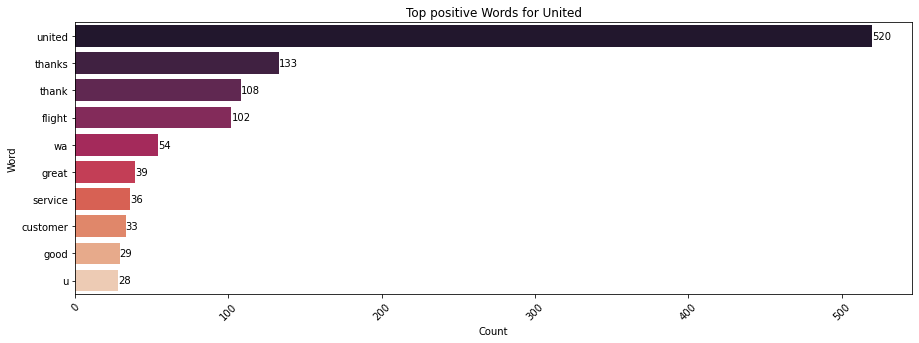

In [32]:
#positive words
unitedTweets = tweets[(tweets["airline"] == "United") & (tweets["airline_sentiment"] == "positive")]
mostWords(unitedTweets, "Top positive Words for United")

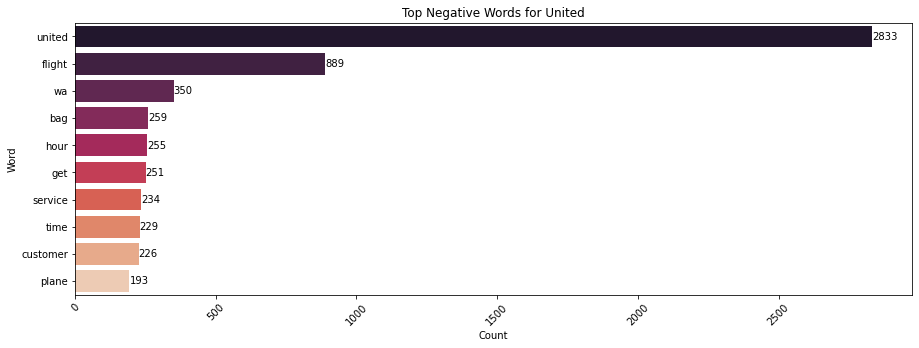

In [33]:
#negative words
unitedTweets = tweets[(tweets["airline"] == "United") & (tweets["airline_sentiment"] == "negative")]
mostWords(unitedTweets, "Top Negative Words for United")

#### Southwest

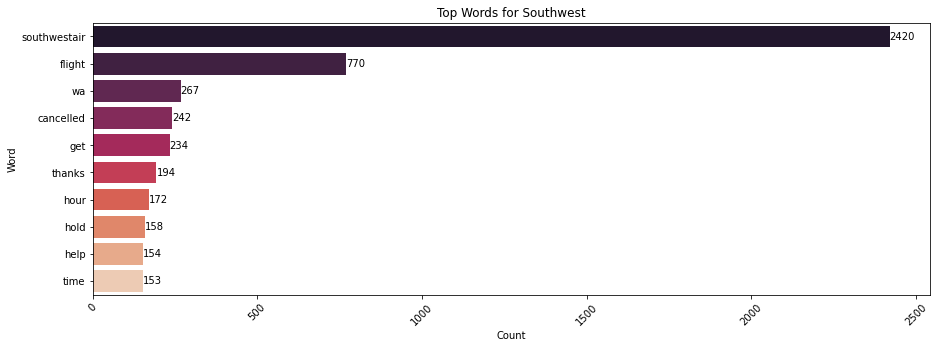

In [34]:
#all words
swTweets = tweets[tweets["airline"] == "Southwest"]
mostWords(swTweets, "Top Words for Southwest")

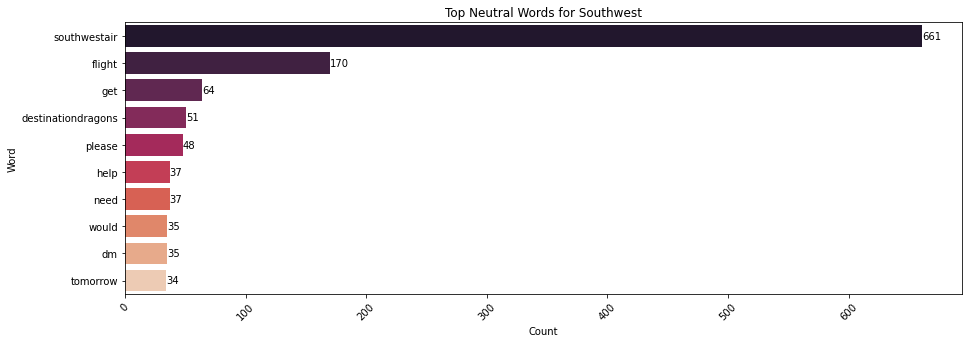

In [35]:
#neutral words
swTweets = tweets[(tweets["airline"] == "Southwest") & (tweets["airline_sentiment"] == "neutral")]
mostWords(swTweets, "Top Neutral Words for Southwest")

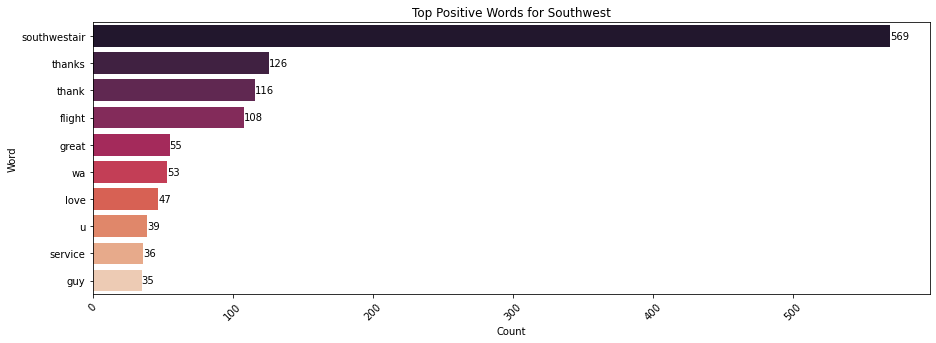

In [36]:
#positive words
swTweets = tweets[(tweets["airline"] == "Southwest") & (tweets["airline_sentiment"] == "positive")]
mostWords(swTweets, "Top Positive Words for Southwest")

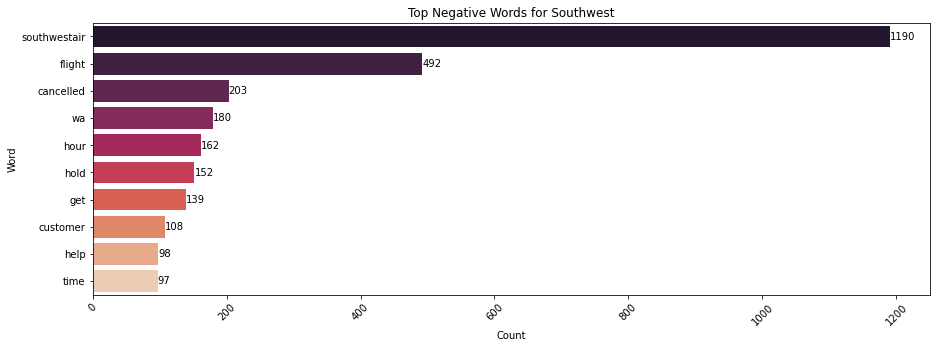

In [37]:
#negative words
swTweets = tweets[(tweets["airline"] == "Southwest") & (tweets["airline_sentiment"] == "negative")]
mostWords(swTweets, "Top Negative Words for Southwest")

#### Delta

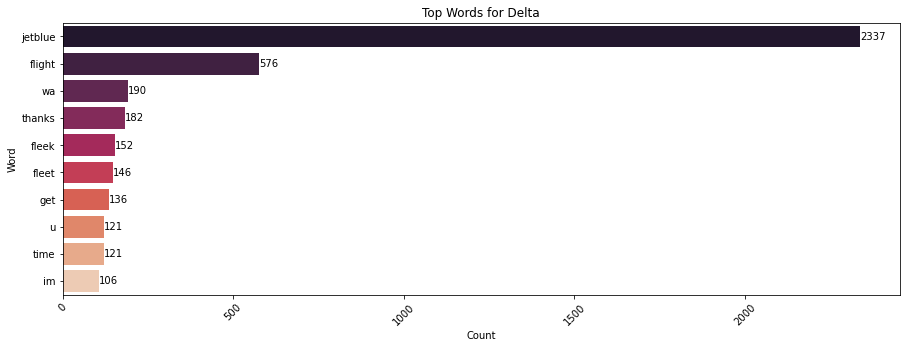

In [38]:
#all words
deltaTweets = tweets[tweets["airline"] == "Delta"]
mostWords(deltaTweets, "Top Words for Delta")

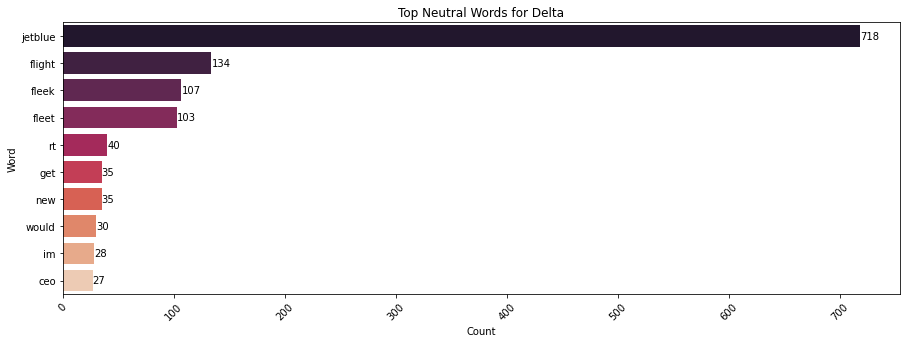

In [39]:
#neutral
deltaTweets = tweets[(tweets["airline"] == "Delta")& (tweets["airline_sentiment"] == "neutral")]
mostWords(deltaTweets, "Top Neutral Words for Delta")

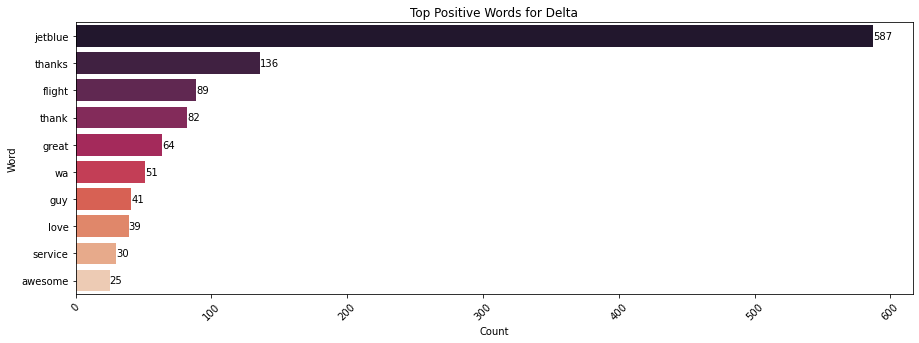

In [40]:
#positive
deltaTweets = tweets[(tweets["airline"] == "Delta")& (tweets["airline_sentiment"] == "positive")]
mostWords(deltaTweets, "Top Positive Words for Delta")

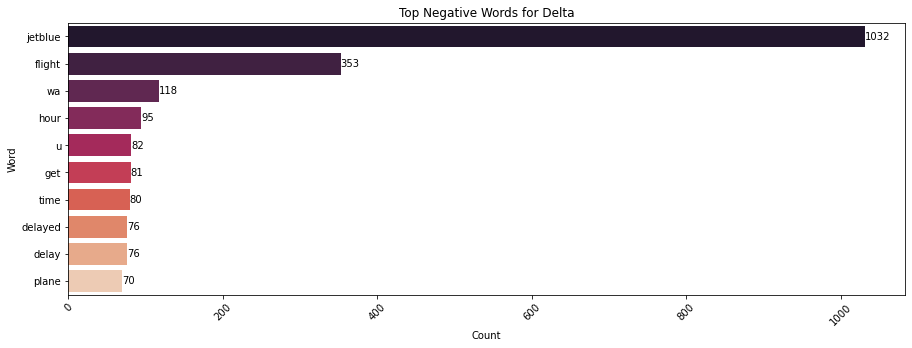

In [41]:
#negative
deltaTweets = tweets[(tweets["airline"] == "Delta")& (tweets["airline_sentiment"] == "negative")]
mostWords(deltaTweets, "Top Negative Words for Delta")

#### US Airways

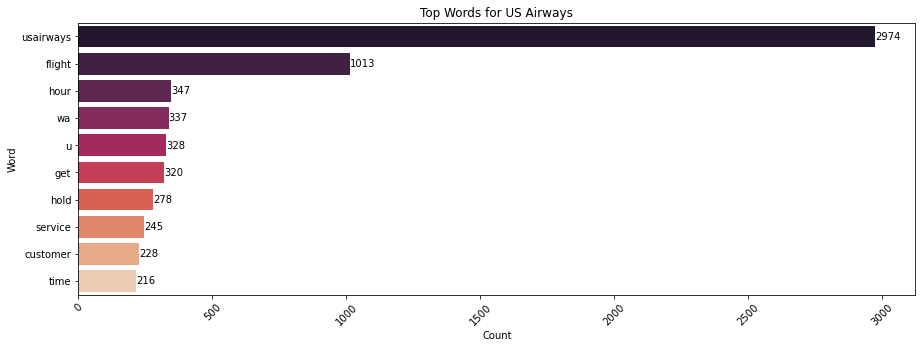

In [42]:
#all words
usTweets = tweets[tweets["airline"] == "US Airways"]
mostWords(usTweets, "Top Words for US Airways")

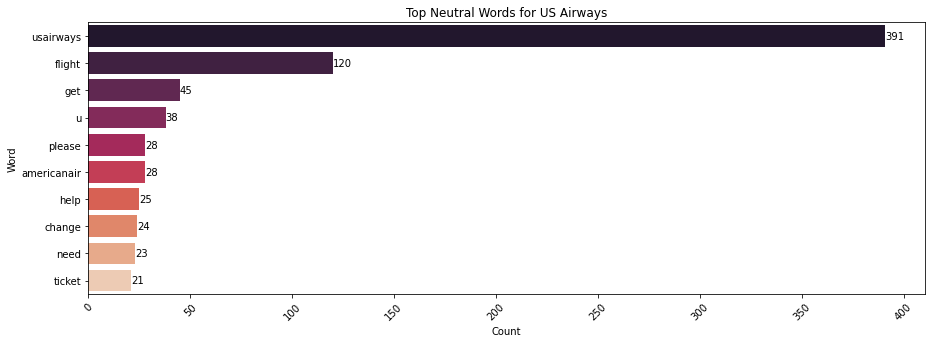

In [43]:
#neutral words
usTweets = tweets[(tweets["airline"] == "US Airways")& (tweets["airline_sentiment"] == "neutral")]
mostWords(usTweets, "Top Neutral Words for US Airways")

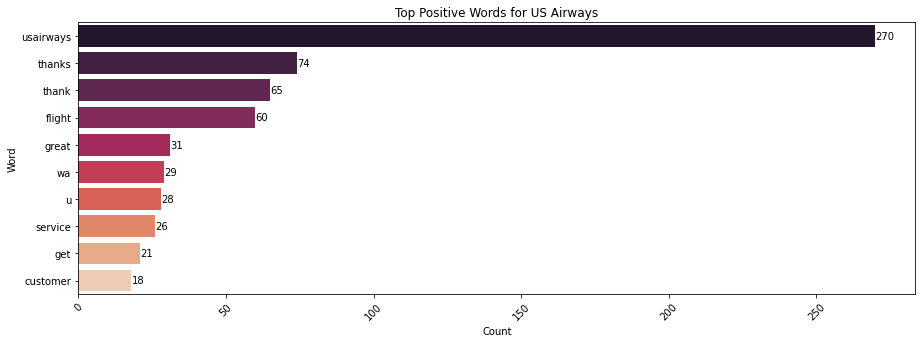

In [44]:
#positive words
usTweets = tweets[(tweets["airline"] == "US Airways")& (tweets["airline_sentiment"] == "positive")]
mostWords(usTweets, "Top Positive Words for US Airways")

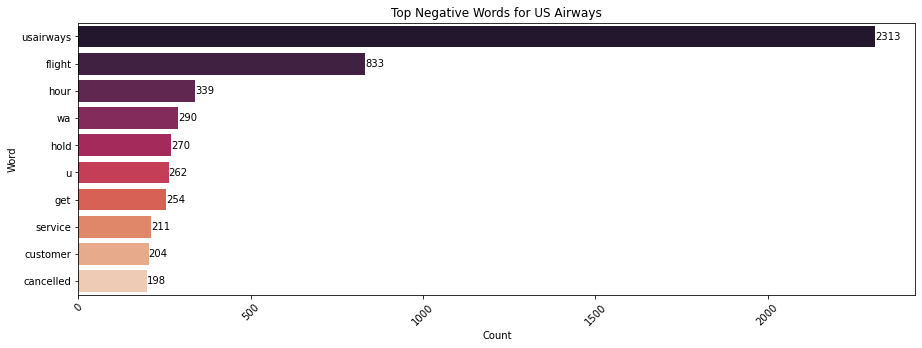

In [45]:
#negative words
usTweets = tweets[(tweets["airline"] == "US Airways")& (tweets["airline_sentiment"] == "negative")]
mostWords(usTweets, "Top Negative Words for US Airways")

#### American

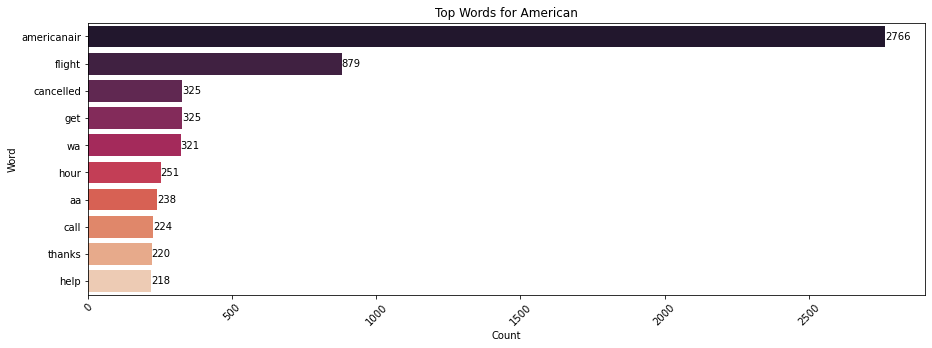

In [46]:
#all words
americanTweets = tweets[tweets["airline"] == "American"]
mostWords(americanTweets, "Top Words for American")

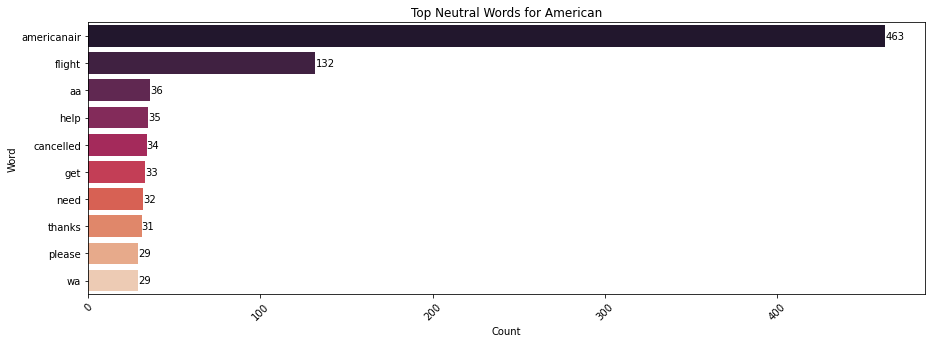

In [47]:
#neutral words
americanTweets = tweets[(tweets["airline"] == "American") & (tweets["airline_sentiment"] == "neutral")]
mostWords(americanTweets, "Top Neutral Words for American")

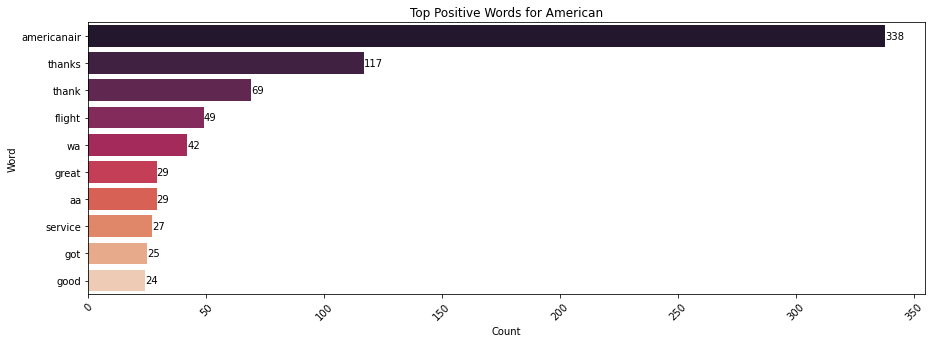

In [48]:
#positive words
americanTweets = tweets[(tweets["airline"] == "American") & (tweets["airline_sentiment"] == "positive")]
mostWords(americanTweets, "Top Positive Words for American")

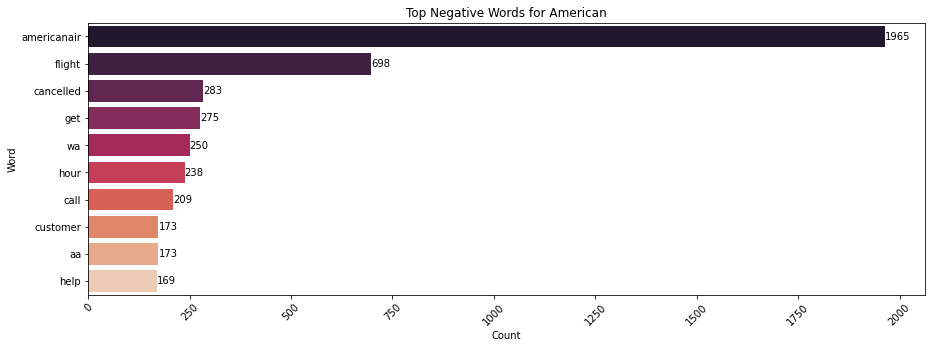

In [49]:
#negative words
americanTweets = tweets[(tweets["airline"] == "American") & (tweets["airline_sentiment"] == "negative")]
mostWords(americanTweets, "Top Negative Words for American")

### Let's look at the negative reason

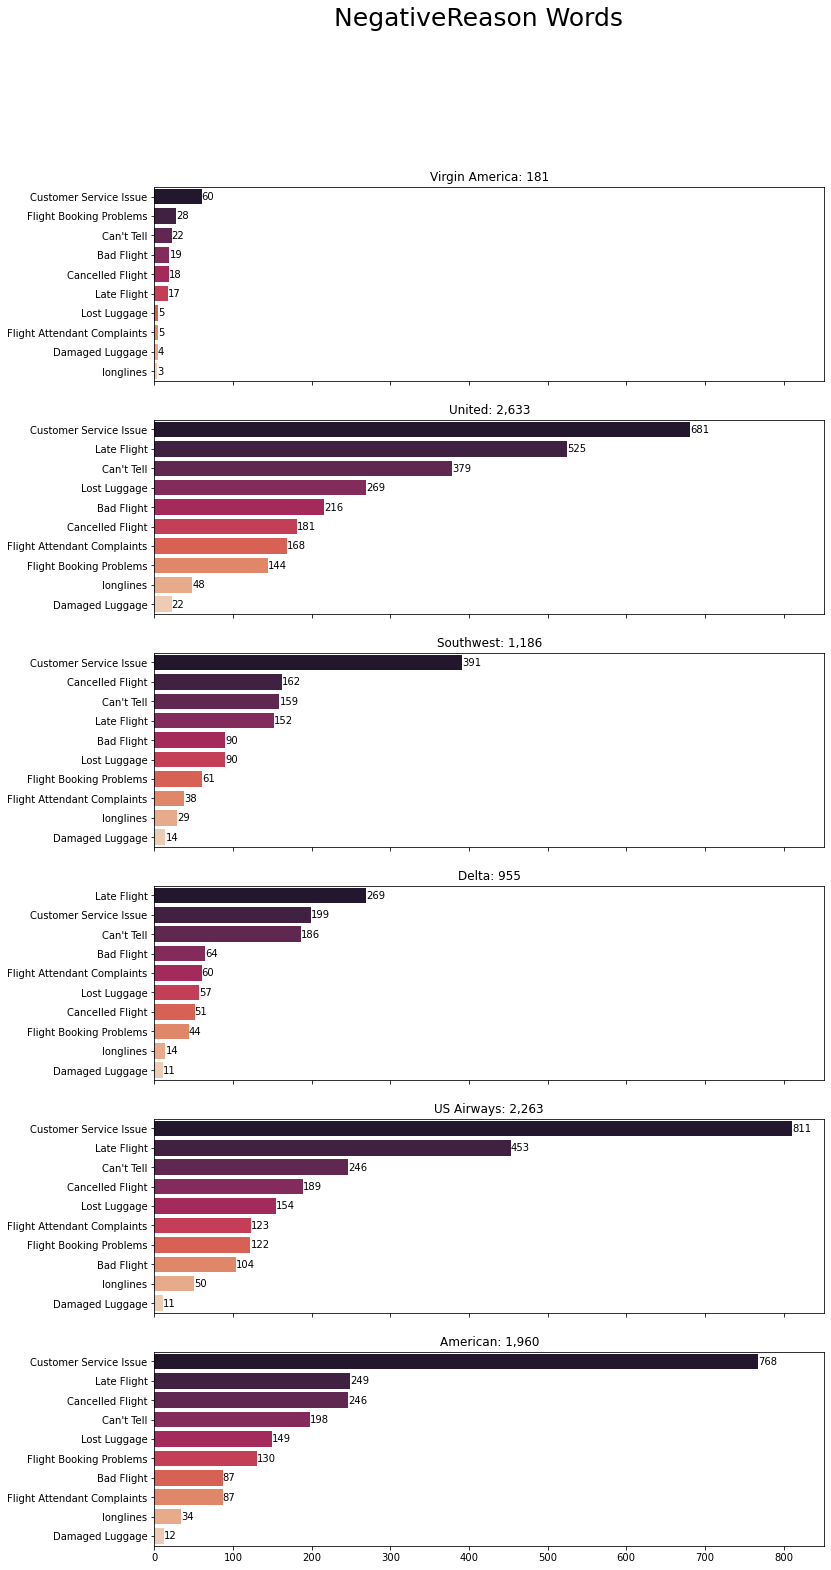

In [50]:
negDF = tweets[tweets["airline_sentiment"] == "negative"]

fig, axes = plt.subplots(6, 1, figsize=(12, 25), sharex=True)
axes = axes.flatten()
names = negDF['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = negDF[negDF.airline==name], y = 'negativereason',
                       palette='rocket',
                       order = negDF[negDF.airline==name].negativereason.value_counts().index, ax = n)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"{name}: {format(len(negDF[negDF.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("NegativeReason Words", fontsize = 25)
plt.show()

### Date vs Airline Sentiment <a class="anchor" id="Date"></a>

In [51]:
from datetime import datetime

#convert tweet created column to datetime
tweets["tweet_created"] = pd.to_datetime(tweets["tweet_created"])

#drop timestmp 
tweets["tweet_created"] = tweets["tweet_created"].dt.date

#tweets.head(3)

# group by date , airline, and airline sentiment 
tweetGroup = tweets.groupby(["tweet_created", "airline", "airline_sentiment"]).size()
tweetGroup

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

The tweets are between Feb. 16, 2015 and Feb 24, 2015

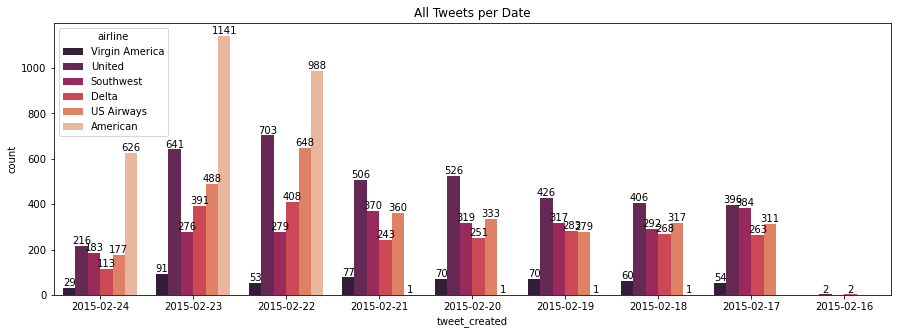

In [52]:
# All tweets per date

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "tweet_created", hue="airline", data=tweets, palette="rocket")
plt.title("All Tweets per Date")

for container in axes.containers:
    axes.bar_label(container)

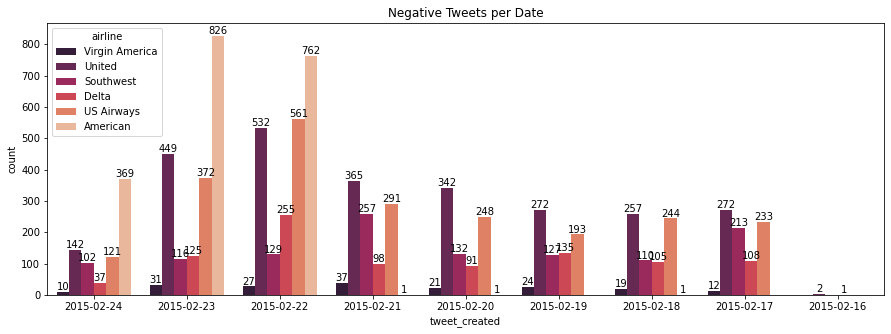

In [53]:
# Negative tweets per date

negTweets = tweets[tweets["airline_sentiment"] == 'negative']

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "tweet_created", hue="airline", data=negTweets, palette="rocket")
plt.title("Negative Tweets per Date")

for container in axes.containers:
    axes.bar_label(container)

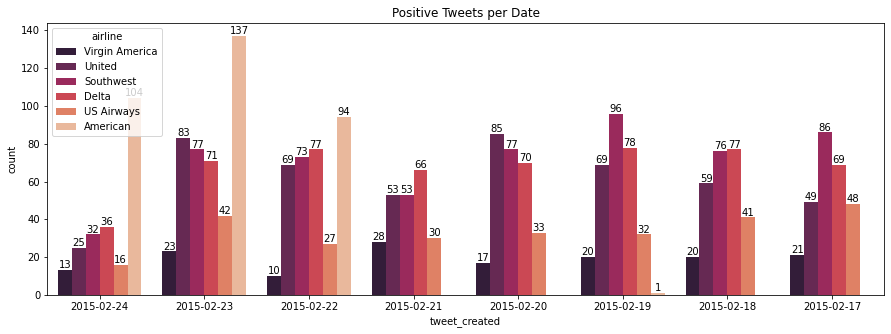

In [54]:
# Positive tweets per date

posTweets = tweets[tweets["airline_sentiment"] == 'positive']

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "tweet_created", hue="airline", data=posTweets, palette="rocket")
plt.title("Positive Tweets per Date")

for container in axes.containers:
    axes.bar_label(container)

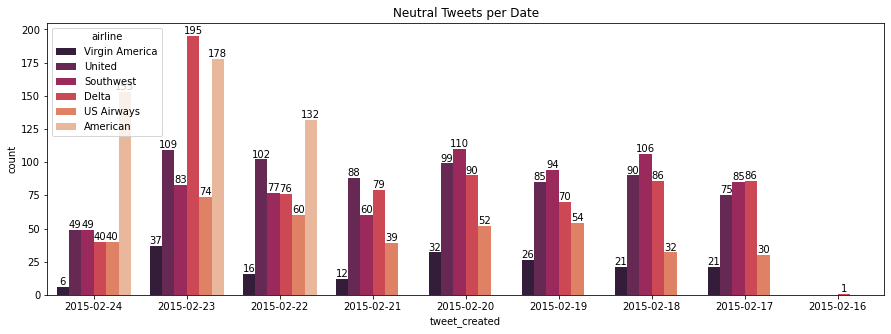

In [55]:
# Neutral tweets per date

neuTweets = tweets[tweets["airline_sentiment"] == 'neutral']

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "tweet_created", hue="airline", data=neuTweets, palette="rocket")
plt.title("Neutral Tweets per Date")

for container in axes.containers:
    axes.bar_label(container)

## user_timezone  <a class="anchor" id="user_timezone"></a>

In [56]:
#number of timezones 
tweets.user_timezone.nunique()

85

In [57]:
topTZ = tweets.user_timezone.value_counts().head(10)
topTZ = topTZ.to_frame()
topTZ = topTZ.reset_index()
topTZ = topTZ.rename(columns={"index": "Timezone", "user_timezone": "Count"})
topTZ.head()

,Timezone,Count
0,Eastern Time (US & Canada),3744
1,Central Time (US & Canada),1931
2,Pacific Time (US & Canada),1208
3,Quito,738
4,Atlantic Time (Canada),497


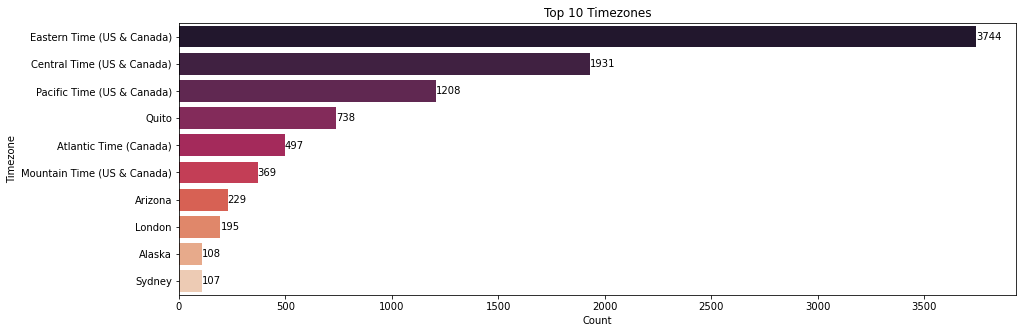

In [58]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.barplot(y = "Timezone", x="Count", data=topTZ, palette="rocket")
plt.title("Top 10 Timezones")

#plt.xticks(rotation=90)

for container in axes.containers:
    axes.bar_label(container)

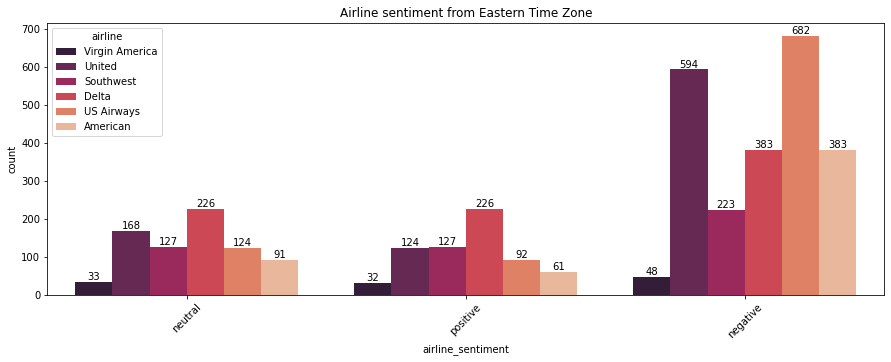

In [59]:
eastTZ = tweets[tweets["user_timezone"] == "Eastern Time (US & Canada)"]

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "airline_sentiment", hue="airline", data=eastTZ, palette="rocket")
plt.title("Airline sentiment from Eastern Time Zone")

plt.xticks(rotation=45)

for container in axes.containers:
    axes.bar_label(container)

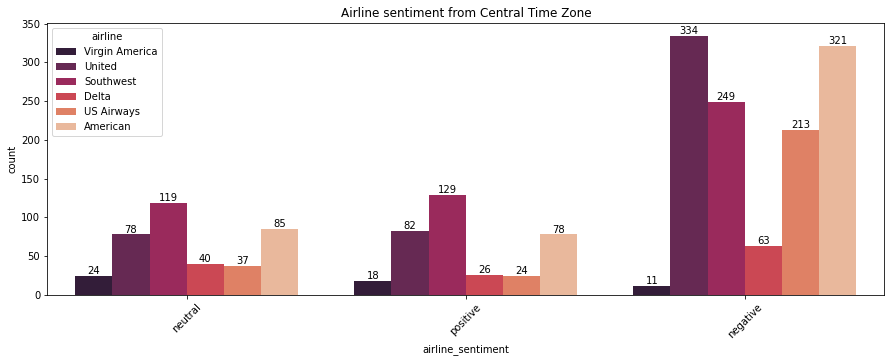

In [60]:
centralTZ = tweets[tweets["user_timezone"] == "Central Time (US & Canada)"]

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "airline_sentiment", hue="airline", data=centralTZ, palette="rocket")
plt.title("Airline sentiment from Central Time Zone")

plt.xticks(rotation=45)

for container in axes.containers:
    axes.bar_label(container)

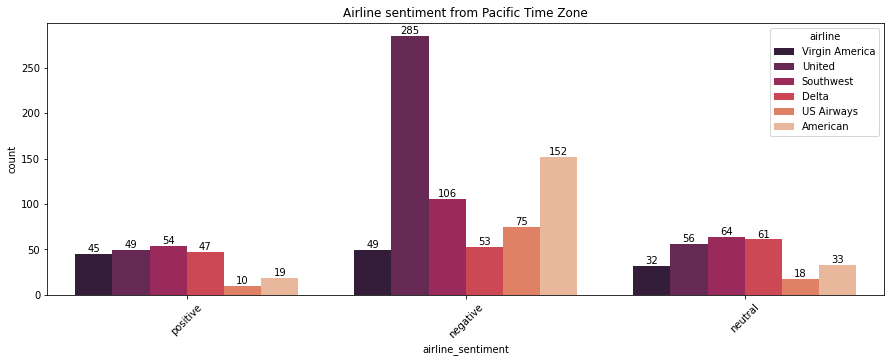

In [61]:
pacificTZ = tweets[tweets["user_timezone"] == "Pacific Time (US & Canada)"]

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "airline_sentiment", hue="airline", data=pacificTZ, palette="rocket")
plt.title("Airline sentiment from Pacific Time Zone")

plt.xticks(rotation=45)

for container in axes.containers:
    axes.bar_label(container)

# Conclusion <a class="anchor" id="Conclusion"></a>

Tracking a sentiment analysis is a way that companies can see what their customers think about their company.

Most of the the sentiment are negative.

#### Reasons for negative sentiment

Delta, American, US Airways, and United top complaints are customer service issue and late flight.

Virgin America top complaints are customer service issues and flight booking problems. 

Southwest top complaints are customer service issues and cancelled flights.